Step 1: Load the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("credit_risk_dataset.csv")

# Preview the data
df.head()


,loan_amount,income,credit_score,employment_length,purpose,age,loan_status
0,16795,47446,747,4,home_improvement,27,1
1,1860,144040,664,6,education,60,0
2,39158,33046,625,2,credit_card,42,0
3,45732,149922,766,6,home_improvement,37,1
4,12284,44818,713,3,credit_card,36,0


Step 2: Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   loan_amount        1000 non-null   int64 
 1   income             1000 non-null   int64 
 2   credit_score       1000 non-null   int64 
 3   employment_length  1000 non-null   int64 
 4   purpose            1000 non-null   object
 5   age                1000 non-null   int64 
 6   loan_status        1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


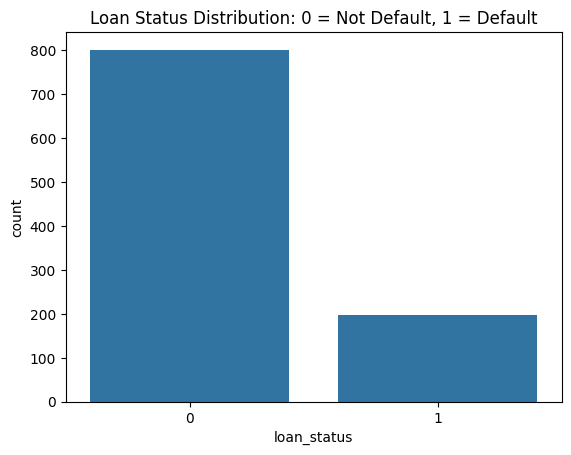

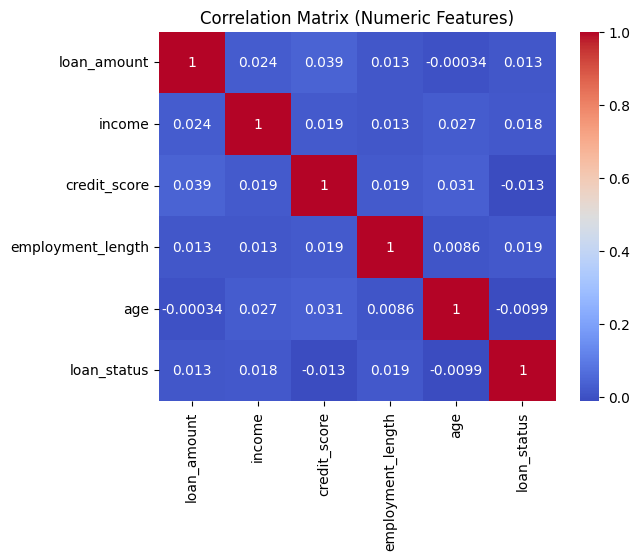

In [3]:
# Basic structure
df.info()

df.describe()#Summary Statistics
df.isnull().sum()#Check Missing Values

#Check Target Distribution
df["loan_status"].value_counts()
df["loan_status"].value_counts(normalize=True) * 100

#Visualize class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="loan_status", data=df)
plt.title("Loan Status Distribution: 0 = Not Default, 1 = Default")
plt.show()

#Correlation Heatmap
numeric_df = df.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

Step 3: Data Preprocessing & Feature Engineering

In [4]:
# Encode Categorical Column
df_encoded = pd.get_dummies(df, columns=["purpose"], drop_first=True)
df_encoded.head()

# Feature and Target Split
X = df_encoded.drop("loan_status", axis=1)
y = df_encoded["loan_status"]

#Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 4: Model Building with LightGBM

In [6]:
#Import and Train LightGBM Classifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred = lgb_model.predict(X_test_scaled)


[LightGBM] [Info] Number of positive: 158, number of negative: 642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.197500 -> initscore=-1.401993
[LightGBM] [Info] Start training from score -1.401993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [7]:
# Evaluate the Model

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[151   9]
 [ 35   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       160
           1       0.36      0.12      0.19        40

    accuracy                           0.78       200
   macro avg       0.58      0.53      0.53       200
weighted avg       0.72      0.78      0.74       200

Accuracy Score: 0.78


Step 5 – Feature Importance & Visualization

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_43392\1376056911.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")


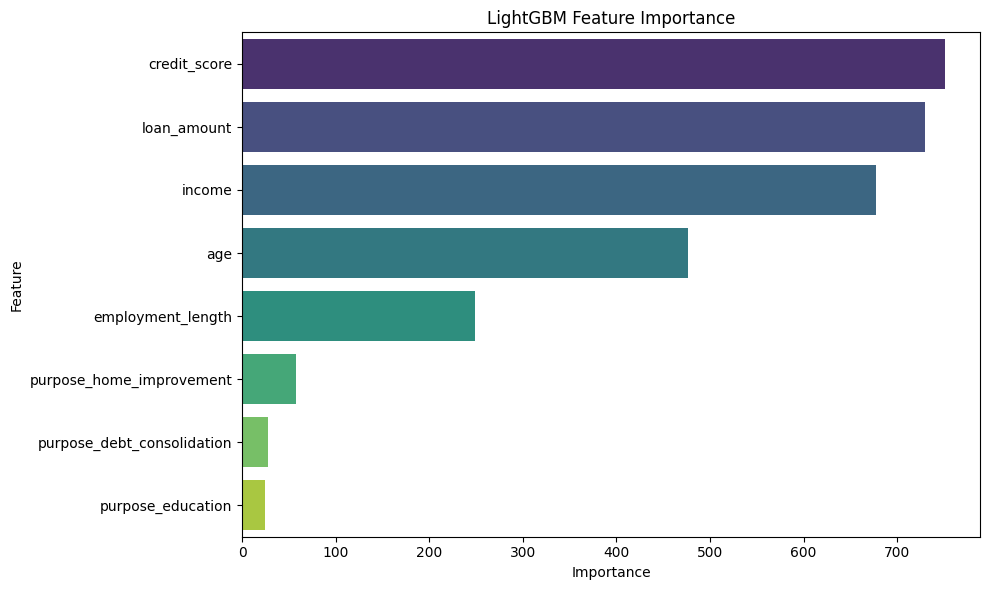

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
feature_importance = lgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("LightGBM Feature Importance")
plt.tight_layout()
plt.show()


In [ ]:
import os

# Create the models folder 
os.makedirs("models", exist_ok=True)

import joblib

# save the model
joblib.dump(lgb_model, "models/lgb_credit_model.pkl")

['models/lgb_credit_model.pkl']

In [13]:
import pkg_resources

with open("requirements.txt", "w") as f:
    for dist in pkg_resources.working_set:
        f.write(f"{dist.project_name}=={dist.version}\n")


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_43392\1442171101.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
